In [2]:
!pip install wfdb mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.5 MB/s eta 0:00:00


In [3]:
import zipfile
import mne
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import wfdb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from scipy.signal import welch

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
normalfilepath= glob.glob('/content/drive/MyDrive/dataeeg/eeg/data/normal/*.txt')
seizurefilepath= glob.glob('/content/drive/MyDrive/dataeeg/eeg/data/seizure/*.txt')
normalpath=[i for i in normalfilepath]
seizurepath=[i for i in seizurefilepath]

In [6]:
i=1
seizure = pd.read_csv(seizurepath[0], header=None)
seizure=seizure.transpose()
seizure=seizure[0:1]
while i<750:
  ndf = pd.read_csv(seizurepath[i], header=None)
  ndf=ndf.transpose()
  ndf=ndf[0:1]
  seizure=seizure.append(ndf)
  print("iteration num ",i)
  i=i+1

<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  1


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  2


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  3


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  4


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  5


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  6


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  7


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  8


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  9


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  10
iteration num  11
iteration num  12
iteration num  13
iteration num  14
iteration num  15
iteration num  16
iteration num  17
iteration num  18
iteration num  19


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  20
iteration num  21
iteration num  22
iteration num  23
iteration num  24


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  25
iteration num  26
iteration num  27
iteration num  28
iteration num  29
iteration num  30


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  31
iteration num  32
iteration num  33
iteration num  34
iteration num  35


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  36
iteration num  37
iteration num  38
iteration num  39
iteration num  40
iteration num  41


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  42
iteration num  43
iteration num  44
iteration num  45
iteration num  46
iteration num  47


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  48
iteration num  49
iteration num  50
iteration num  51
iteration num  52
iteration num  53


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  54
iteration num  55
iteration num  56
iteration num  57
iteration num  58


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  59
iteration num  60
iteration num  61
iteration num  62
iteration num  63


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  64
iteration num  65
iteration num  66
iteration num  67
iteration num  68
iteration num  69
iteration num  70


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  71
iteration num  72
iteration num  73


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  74
iteration num  75
iteration num  76
iteration num  77
iteration num  78
iteration num  79


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  80
iteration num  81
iteration num  82
iteration num  83
iteration num  84
iteration num  85


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  86
iteration num  87
iteration num  88
iteration num  89
iteration num  90
iteration num  91


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  92
iteration num  93
iteration num  94
iteration num  95
iteration num  96
iteration num  97
iteration num  98


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  99
iteration num  100
iteration num  101
iteration num  102
iteration num  103
iteration num  104
iteration num  105
iteration num  106
iteration num  107
iteration num  108


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  109
iteration num  110
iteration num  111
iteration num  112
iteration num  113
iteration num  114


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  115
iteration num  116
iteration num  117
iteration num  118
iteration num  119
iteration num  120
iteration num  121
iteration num  

<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

122
iteration num  123
iteration num  124
iteration num  125
iteration num  126
iteration num  127
iteration num  128
iteration num  129


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  130
iteration num  131
iteration num  132
iteration num  133
iteration num  134
iteration num  135
iteration num  136
iteration num  137


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  138
iteration num  139
iteration num  140
iteration num  141
iteration num  142
iteration num  143
iteration num  144
iteration num  145


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  146
iteration num  147
iteration num  148
iteration num  149
iteration num  150
iteration num  151
iteration num  152
iteration num  153
iteration num  154


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  155
iteration num  156
iteration num  157
iteration num  158
iteration num  159
iteration num  160
iteration num  161


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  162
iteration num  163
iteration num  164
iteration num  165
iteration num  166
iteration num  167
iteration num  168
iteration num  169


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  170
iteration num  171
iteration num  172
iteration num  173
iteration num  174
iteration num  175
iteration num 

<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


 176
iteration num  177
iteration num  178
iteration num  179


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  180
iteration num  181
iteration num  182


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  183
iteration num  184
iteration num  185


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  186
iteration num  187
iteration num  188


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  189
iteration num  190
iteration num  191


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  192
iteration num  193
iteration num  194
iteration num  195
iteration num  196


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  197
iteration num  198
iteration num  199
iteration num  200


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  201
iteration num  202
iteration num  203
iteration num  204
iteration num  205
iteration num  206


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  207
iteration num  208
iteration num  209
iteration num  210


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  211
iteration num  212
iteration num  213
iteration num  214


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  215
iteration num  216
iteration num  217
iteration num  218


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  219
iteration num  220
iteration num  221
iteration num  222
iteration num  223


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  224
iteration num  225
iteration num  226
iteration num  227


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  228
iteration num  229
iteration num  230
iteration num  231


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  232
iteration num  233
iteration num  234
iteration num  235
iteration num  236
iteration num  237
iteration num  238


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  239
iteration num  240
iteration num  241
iteration num  242
iteration num  243
iteration num  244
iteration num  245
iteration num  246


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  247
iteration num  248
iteration num  249
iteration num  250
iteration num  251
iteration num  252
iteration num  253


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  254
iteration num  255
iteration num  256
iteration num  257
iteration num  258
iteration num  259
iteration num  260
iteration num  261


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  262
iteration num  263
iteration num  264
iteration num  265
iteration num  266
iteration num  267
iteration num  268


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  269
iteration num  270
iteration num  271
iteration num  272
iteration num  273
iteration num  274
iteration num  275


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  276
iteration num  277
iteration num  278
iteration num  279
iteration num  280


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  281
iteration num  282
iteration num  283
iteration num  284
iteration num  285


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  286
iteration num  287
iteration num  288
iteration num  289
iteration num  290


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  291
iteration num  292
iteration num  293
iteration num  294
iteration num  295


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  296
iteration num  297
iteration num  298
iteration num  299


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  300
iteration num  301
iteration num  302
iteration num  303


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  304
iteration num  305
iteration num  306
iteration num  307


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  308
iteration num  309
iteration num  310


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  311
iteration num  312
iteration num  313


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  314
iteration num  315
iteration num  316


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  317
iteration num  318
iteration num  319


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  320
iteration num  321
iteration num  322
iteration num 

<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


 323
iteration num  324
iteration num  325


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  326
iteration num  327
iteration num  328
iteration num  329


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  330
iteration num  331
iteration num  332


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  333
iteration num  334
iteration num  335


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  336
iteration num  337
iteration num  338


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  339
iteration num  340
iteration num  341


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  342
iteration num  343
iteration num  344


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  345
iteration num  346
iteration num  347
iteration num  348
iteration num  349
iteration num  350
iteration num  351
iteration num  352


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  353
iteration num  354
iteration num  355


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  356
iteration num  357
iteration num  358


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  359
iteration num  360
iteration num  361


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  362
iteration num  363
iteration num  364
iteration num  365


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  366
iteration num  367
iteration num  368


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  369
iteration num  370


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  371
iteration num  372
iteration num  373
iteration num  374


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  375
iteration num  376
iteration num  377
iteration num  378


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  379
iteration num  380
iteration num  381


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  382
iteration num  383
iteration num  384
iteration num  385


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  386
iteration num  387
iteration num  388


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  389
iteration num  390


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  391
iteration num  392
iteration num  393


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  394
iteration num  395
iteration num  396


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  397
iteration num  398


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  399
iteration num  400
iteration num  401


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  402
iteration num  403
iteration num  404


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  405
iteration num  406
iteration num  407
iteration num  408
iteration num  409


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  410
iteration num  411
iteration num  412
iteration num  413
iteration num  414
iteration num  415


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  416
iteration num  417
iteration num  418
iteration num  419
iteration num  420
iteration num  421


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  422
iteration num  423
iteration num  424
iteration num  425
iteration num  426


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  427
iteration num  428
iteration num  429
iteration num  430


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  431
iteration num  432
iteration num  433
iteration num  434


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  435
iteration num  436
iteration num  437


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  438
iteration num  439
iteration num  440


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  441
iteration num  442
iteration num  443
iteration num  444


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  445
iteration num  446
iteration num  447
iteration num  448


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  449
iteration num  450
iteration num  451


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  452
iteration num  453
iteration num  454


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  455
iteration num  456
iteration num  457


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  458
iteration num  459
iteration num  460
iteration num  461
iteration num  462


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  463
iteration num  464
iteration num  465
iteration num  466
iteration num  467


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  468
iteration num  469
iteration num  470
iteration num  471
iteration num  472
iteration num  473


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  474
iteration num  475
iteration num  476
iteration num  477


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  478
iteration num  479
iteration num  480
iteration num  481


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  482
iteration num  483
iteration num  484
iteration num  485
iteration num  486
iteration num  487


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  488
iteration num  489
iteration num  490


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  491
iteration num  492
iteration num  493
iteration num  494
iteration num  495


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  496
iteration num  497
iteration num  498
iteration num  499
iteration num  500
iteration num  501


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  502
iteration num  503
iteration num  504
iteration num  505
iteration num  506
iteration num  507


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  508
iteration num  509
iteration num  510
iteration num  511
iteration num  512


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  513
iteration num  514
iteration num  515
iteration num  516
iteration num  517


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  518
iteration num  519
iteration num  520


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  521
iteration num  522
iteration num  523
iteration num  524


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  525
iteration num  526
iteration num  527
iteration num  528
iteration num  529


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  530
iteration num  531
iteration num  532
iteration num  533


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  534
iteration num  535
iteration num  536
iteration num  537


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  538
iteration num  539
iteration num  540
iteration num  541
iteration num  542
iteration num  543
iteration num  544
iteration num  545
iteration num  546
iteration num  547


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  548
iteration num  549
iteration num  550
iteration num  551


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  552
iteration num  553
iteration num  554
iteration num  555
iteration num  556


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  557
iteration num  558
iteration num  559
iteration num  560


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  561
iteration num  562
iteration num  563
iteration num  564


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  565
iteration num  566
iteration num  567
iteration num  568
iteration num  569


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-

iteration num  570
iteration num  571
iteration num  572
iteration num  573
iteration num  574
iteration num  575
iteration num  576
iteration num  577


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  578
iteration num  579
iteration num  580
iteration num  581


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  582
iteration num  583
iteration num  584
iteration num  585


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  586
iteration num  587
iteration num  588
iteration num  589


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  590
iteration num  591
iteration num  592


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  593
iteration num  594


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  595
iteration num  596
iteration num  597
iteration num  598


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  599
iteration num  600


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  601
iteration num  602


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  603
iteration num  604
iteration num  605


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  606
iteration num  607
iteration num  608


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  609
iteration num  610


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  611
iteration num  612


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  613
iteration num  614
iteration num 

<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


 615
iteration num  616
iteration num  617


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  618
iteration num  619
iteration num  620


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  621
iteration num  622
iteration num  623
iteration num  624


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  625
iteration num  626
iteration num  627
iteration num  628


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  629
iteration num  630


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  631
iteration num  632


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  633
iteration num  634
iteration num  635


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  636
iteration num  637
iteration num  638


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  639


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  640
iteration num  641
iteration num  642


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  643
iteration num  644


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  645
iteration num  646
iteration num  647


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  648
iteration num  649


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  650
iteration num  651
iteration num  652


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  653
iteration num  654


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  655
iteration num  656


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  657
iteration num  658


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  659
iteration num  660


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  661
iteration num  662


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  663
iteration num  664


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  665
iteration num  666


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  667
iteration num  668


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  669
iteration num  670


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  671
iteration num  672
iteration num  673


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  674
iteration num  675
iteration num  676


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  677
iteration num  678
iteration num  679


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  680
iteration num  681
iteration num  682


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  683
iteration num  684
iteration num  685
iteration num  686


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  687
iteration num  688
iteration num  689
iteration num  690


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  691
iteration num  692
iteration num  693


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  694
iteration num  695
iteration num  696


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  697
iteration num  698
iteration num  699


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  700
iteration num  701


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  702
iteration num  703
iteration num  704


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  705
iteration num  706
iteration num  707
iteration num  708


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  709
iteration num  710
iteration num  711


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  712
iteration num  713
iteration num  714


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  715
iteration num  716
iteration num  717
iteration num  718


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  719
iteration num  720


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  721
iteration num  722
iteration num  723


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  724
iteration num  725
iteration num  726
iteration num  727


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  728
iteration num  729
iteration num  730


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  731
iteration num  732
iteration num  733
iteration num  734


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  735
iteration num  736
iteration num  737
iteration num  738


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  739
iteration num  740
iteration num  741
iteration num  742


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  743
iteration num  744


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  745
iteration num  746


<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)
<ipython-input-6-ca9df6a51af1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seizure=seizure.append(ndf)


iteration num  747
iteration num  748
iteration num  749


In [7]:
i=1
normal = pd.read_csv(normalpath[0], header=None)
normal=normal.transpose()
normal=normal[0:1]
while i<750:
  ndf = pd.read_csv(normalpath[i], header=None)
  ndf=ndf.transpose()
  ndf=ndf[0:1]
  normal=normal.append(ndf)
  print("iteration num ",i)
  i=i+1

<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  1


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  2


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  3


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  4


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  5


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  6


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  7


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  8


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  9


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  10


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  11


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  12


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  13


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  14


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  15


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  16


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  17


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  18


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  19


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  20


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  21


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  22


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  23


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  24


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  25


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  26


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  27


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  28


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  29


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  30


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  31


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  32


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  33


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  34


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  35


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  36


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  37


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  38


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  39


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  40


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  41


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  42


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  43


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  44


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  45


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  46


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  47


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  48


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  49


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  50


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  51


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  52


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  53


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  54


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  55


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  56


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  57


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  58


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  59


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  60


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  61


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  62


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  63


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  64


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  65


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  66


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  67


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  68


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  69


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  70


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  71


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  72


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  73


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  74


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  75


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  76


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  77


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  78


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  79


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  80


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  81


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  82


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  83


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  84


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  85


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  86


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  87


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  88


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  89


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  90


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  91


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  92


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  93


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  94


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  95


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  96


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  97


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  98


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  99


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  100


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  101


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  102


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  103


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  104


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  105


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  106


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  107


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  108


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  109


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  110


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  111


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  112


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  113


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  114


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  115


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  116


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  117


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  118


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  119


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  120


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  121


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  122


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  123


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  124


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  125


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  126


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  127


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  128


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  129


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  130


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  131


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  132


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  133


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  134


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  135


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  136


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  137


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  138


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  139


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  140


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  141


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  142


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  143


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  144


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  145


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  146


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  147


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  148


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  149


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  150


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  151


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  152


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  153


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  154


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  155


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  156


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  157


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  158


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  159


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  160


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  161


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  162


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  163


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  164


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  165


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  166


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  167


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  168


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  169


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  170


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  171


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  172


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  173


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  174


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  175


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  176


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  177


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  178


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  179


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  180


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  181


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  182


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  183


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  184


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  185


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  186


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  187


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  188


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  189


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  190


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  191


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  192


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  193


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  194


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  195


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  196


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  197


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  198


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  199


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  200


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  201


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  202


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  203


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  204


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  205


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  206


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  207


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  208


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  209


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  210


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  211


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  212


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  213


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  214


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  215


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  216


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  217


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  218


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  219


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  220


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  221


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  222


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  223


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  224


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  225


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  226


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  227


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  228


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  229


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  230


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  231


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  232


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  233


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  234


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  235


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  236


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  237


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  238


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  239


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  240


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  241


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  242


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  243


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  244


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  245


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  246


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  247


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  248


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  249


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  250


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  251


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  252


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  253


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  254


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  255


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  256


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  257


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  258


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  259


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  260


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  261


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  262


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  263


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  264


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  265


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  266


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  267


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  268


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  269


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  270


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  271


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  272


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  273


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  274


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  275


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  276


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  277


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  278


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  279


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  280


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  281


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  282


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  283


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  284


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  285


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  286


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  287


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  288


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  289


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  290


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  291


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  292


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  293


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  294


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  295


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  296


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  297


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  298


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  299


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  300


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  301


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  302


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  303


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  304


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  305


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  306


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  307


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  308


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  309


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  310


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  311


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  312


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  313


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  314


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  315


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  316


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  317


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  318


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  319


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  320


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  321


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  322


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  323


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  324


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  325


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  326


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  327


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  328


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  329


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  330


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  331


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  332


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  333


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  334


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  335


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  336


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  337


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  338


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  339


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  340


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  341


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  342


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  343


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  344


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  345


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  346


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  347


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  348


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  349


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  350


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  351


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  352


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  353


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  354


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  355


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  356


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  357


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  358


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  359


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  360


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  361


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  362


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  363


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  364


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  365


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  366


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  367


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  368


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  369


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  370


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  371


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  372


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  373


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  374


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  375


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  376


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  377


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  378


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  379


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  380


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  381


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  382


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  383


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  384


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  385


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  386


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  387


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  388


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  389


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  390


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  391


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  392


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  393


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  394


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  395


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  396


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  397


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  398


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  399


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  400


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  401


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  402


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  403


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  404


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  405


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  406


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  407


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  408


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  409


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  410


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  411


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  412


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  413


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  414


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  415


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  416


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  417


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  418


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  419


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  420


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  421


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  422


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  423


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  424


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  425


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  426


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  427


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  428


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  429


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  430


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  431


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  432


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  433


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  434


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  435


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  436


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  437


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  438


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  439


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  440


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  441


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  442


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  443


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  444


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  445


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  446


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  447


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  448


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  449


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  450


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  451


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  452


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  453


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  454


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  455


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  456


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  457


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  458


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  459


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  460


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  461


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  462


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  463


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  464


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  465


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  466


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  467


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  468


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  469


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  470


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  471


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  472


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  473


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  474


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  475


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  476


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  477


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  478


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  479


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  480


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  481


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  482


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  483


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  484


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  485


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  486


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  487


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  488


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  489


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  490


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  491


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  492


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  493


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  494


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  495


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  496


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  497


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  498


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  499


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  500


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  501


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  502


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  503


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  504


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  505


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  506


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  507


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  508


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  509


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  510


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  511


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  512


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  513


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  514


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  515


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  516


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  517


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  518


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  519


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  520


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  521


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  522


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  523


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  524


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  525


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  526


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  527


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  528


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  529


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  530


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  531


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  532


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  533


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  534


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  535


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  536


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  537


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  538


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  539


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  540


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  541


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  542


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  543


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  544


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  545


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  546


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  547


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  548


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  549


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  550


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  551


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  552


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  553


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  554


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  555


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  556


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  557


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  558


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  559


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  560


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  561


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  562


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  563


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  564


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  565


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  566


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  567


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  568


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  569


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  570


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  571


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  572


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  573


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  574


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  575


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  576


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  577


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  578


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  579


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  580


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  581


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  582


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  583


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  584


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  585


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  586


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  587


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  588


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  589


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  590


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  591


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  592


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  593


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  594


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  595


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  596


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  597


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  598


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  599


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  600


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  601


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  602


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  603


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  604


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  605


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  606


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  607


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  608


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  609


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  610


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  611


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  612


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  613


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  614


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  615


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  616


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  617


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  618


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  619


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  620


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  621


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  622


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  623


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  624


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  625


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  626


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  627


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  628


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  629


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  630


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  631


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  632


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  633


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  634


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  635


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  636


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  637


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  638


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  639


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  640


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  641


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  642


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  643


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  644


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  645


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  646


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  647


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  648


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  649


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  650


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  651


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  652


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  653


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  654


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  655


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  656


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  657


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  658


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  659


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  660


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  661


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  662


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  663


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  664


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  665


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  666


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  667


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  668


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  669


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  670


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  671


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  672


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  673


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  674


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  675


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  676


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  677


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  678


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  679


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  680


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  681


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  682


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  683


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  684


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  685


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  686


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  687


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  688


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  689


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  690


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  691


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  692


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  693


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  694


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  695


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  696


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  697


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  698


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  699


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  700


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  701


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  702


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  703


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  704


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  705


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  706


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  707


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  708


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  709


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  710


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  711


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  712


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  713


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  714


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  715


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  716


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  717


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  718


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  719


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  720


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  721


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  722


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  723


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  724


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  725


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  726


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  727


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  728


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  729


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  730


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  731


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  732


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  733


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  734


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  735


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  736


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  737


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  738


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  739


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  740


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  741


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  742


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  743


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  744


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  745


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  746


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  747


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


iteration num  748
iteration num  749


<ipython-input-7-41a74a999fe4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal=normal.append(ndf)


In [15]:
reshaped_normal =np.reshape(np.array(normal), (7680,1000))
reshaped_seizure = np.reshape(np.array(seizure), (7680,1000))

In [9]:

# Specify the path to your EDF file
file_path = "/content/drive/MyDrive/dataeeg/eeg/data/sleeping/sc4002e0.edf"

# Read the EDF file
data = mne.io.read_raw_edf(file_path)

# Get the raw data
sleep = data.get_data()

# Get the channel names
channels = data.ch_names

Extracting EDF parameters from /content/drive/MyDrive/dataeeg/eeg/data/sleeping/sc4002e0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [10]:
sleepT = pd.DataFrame(sleep)
sleep =np.reshape(np.array(sleepT[0:1]), (8490,1000))

7680

In [16]:
sleep_num_samples = len(sleep)
normal_num_samples = len(reshaped_normal)
seizure_num_samples = len(reshaped_seizure)


In [20]:
reshaped_normal.shape

(7680, 1000)

In [13]:


duration_seconds = 10.0  # Adjust the duration based on your segment

# Estimate the sampling frequency
sleep_sampling_frequency = sleep_num_samples / duration_seconds
normal_sampling_frequency = normal_num_samples / duration_seconds
seizure_sampling_frequency = seizure_num_samples / duration_seconds


print(f"Estimated sleep_sampling_frequency: {sleep_sampling_frequency} Hz")
print(f"Estimated normal_sampling_frequency: {normal_sampling_frequency} Hz")
print(f"Estimated seizure_sampling_frequency: {seizure_sampling_frequency} Hz")


Estimated sleep_sampling_frequency: 849.0 Hz
Estimated normal_sampling_frequency: 768.0 Hz
Estimated seizure_sampling_frequency: 768.0 Hz


In [22]:
from scipy import signal
# Assuming 'eeg_data' is your raw EEG data with shape (num_samples, num_features)

# Step 1: Remove artifacts and noise using a bandpass filter
def bandpass_filter(signal1, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_signal = signal.filtfilt(b, a, signal1, axis=1)
    return filtered_signal

sleep_filtered = bandpass_filter(sleep, lowcut=0.5 , highcut=4.0, fs=sleep_sampling_frequency)
normal_filtered = bandpass_filter(reshaped_normal, lowcut=8.0, highcut=13.0, fs=normal_sampling_frequency)
seizure_filtered = bandpass_filter(reshaped_seizure, lowcut=8.0, highcut=13.0, fs=seizure_sampling_frequency)

In [24]:
# Step 2: Segment the EEG signal into shorter epochs or time windows
def segment_signal(signal, window_size, overlap):
    num_samples, num_features = signal.shape
    stride = int(window_size * (1 - overlap))
    num_windows = int((num_samples - window_size) / stride) + 1

    segmented_data = np.zeros((num_windows, window_size, num_features))

    for i in range(num_windows):
        start = i * stride
        end = start + window_size
        segmented_data[i, :, :] = signal[start:end, :]

    return segmented_data

window_size = 256  # Adjust according to your preference
overlap = 0.5  # Adjust according to your preference
sleep_data_segmented = segment_signal(sleep_filtered, window_size, overlap)
normal_segmented = segment_signal(normal_filtered, window_size, overlap)
seizure_segmented = segment_signal(seizure_filtered, window_size, overlap)

In [27]:
seizure_segmented.shape

(59, 256, 1000)

In [29]:
# Step 3: Apply a windowing function to each epoch to reduce spectral leakage

def apply_window(segmented_data, window_type='hamming'):
    num_windows, window_size, num_features = segmented_data.shape
    window = signal.get_window(window_type, window_size)
    window = window[:, np.newaxis]

    for i in range(num_windows):
        segmented_data[i, :, :] = segmented_data[i, :, :] * window

    return segmented_data

slepp_data_windowed = apply_window(sleep_data_segmented)
normal_data_windowed = apply_window(normal_segmented)
seizure_data_windowed = apply_window(seizure_segmented)

In [31]:
slepp_data_windowed.shape

(65, 256, 1000)

In [32]:
# Step 4: Apply the FFT to each windowed epoch
def apply_fft(segmented_data, fs):
    num_windows, window_size, num_features = segmented_data.shape
    freqs, psd = signal.welch(segmented_data[0, :, 0], fs, nperseg=window_size)
    num_freqs = len(freqs)
    fft_result = np.zeros((num_windows, num_freqs, num_features))

    for i in range(num_windows):
        for j in range(num_features):
            freqs, psd = signal.welch(segmented_data[i, :, j], fs, nperseg=window_size)
            fft_result[i, :, j] = psd

    return freqs, fft_result




sleep_freqs, sleep_data_fft = apply_fft(slepp_data_windowed, sleep_sampling_frequency)
normal_freqs, normal_data_fft = apply_fft(normal_data_windowed, normal_sampling_frequency)
seizure_freqs, seizure_data_fft = apply_fft(seizure_data_windowed, seizure_sampling_frequency)


In [70]:
sleep_data_fft.shape

(65, 129, 1000)

In [57]:
def extract_features(freqs, psd, frequency_bands):
    features = []

    for band in frequency_bands:
        band_indices = np.where((freqs >= band[0]) & (freqs <= band[1]))[0]
        band_power = np.sum(psd[:, band_indices, :], axis=1)
        features.append(band_power)

    return np.vstack(features).T

# Define frequency bands of interest (e.g., delta, theta, alpha, beta, gamma)
frequency_bands = [(0.5, 4), (4, 8), (8, 13), (13, 30), (30, 40)]

sleep_features = pd.DataFrame(extract_features(sleep_freqs, sleep_data_fft, frequency_bands)).T
normal_features = pd.DataFrame(extract_features(normal_freqs, normal_data_fft, frequency_bands)).T
seizure_features = pd.DataFrame(extract_features(seizure_freqs, seizure_data_fft, frequency_bands)).T

In [58]:
sleep_features.shape

(325, 1000)

In [73]:
# Step 6: Normalize the features
def normalize_features(features):
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    normalized_features = (features - mean) / std
    return normalized_features

sleep_features_normalized = normalize_features(sleep_features)
normal_features_normalized = normalize_features(normal_features)
seizure_features_normalized = normalize_features(seizure_features)


# Now 'eeg_features_normalized' contains the normalized features that can be used for classification or further analysis

In [74]:
sleep_features_normalized['label'] = 'sleep'
normal_features_normalized['label'] = 'normal'
seizure_features_normalized['label'] = 'seizure'
df = pd.concat([sleep_features_normalized, normal_features_normalized, seizure_features_normalized])

In [75]:
X = df.drop('label', axis=1)
y = LabelEncoder().fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [64]:
from keras.utils import to_categorical

In [66]:
X_train.shape

(732, 1000)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature-extracted and normalized data with shape (num_samples, num_features)
# Assuming 'y' is your corresponding labels

# Split the data into training, validation, and test sets

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test_one_hot)[1]
print(f"Test Accuracy: {accuracy}")


In [80]:
model.save('/content/drive/MyDrive/dataeeg/eeg/data/model.pth')

In [101]:
def predict_class(model, signal):
    # Reshape the signal to match the model's input shape
    signal = signal.reshape(1, signal.shape[1], 1)

    # Use the model to predict the class probabilities
    probabilities = model.predict(signal)

    # Get the class with the highest probability
    predicted_class = np.argmax(probabilities)

    # Map the predicted class to its corresponding label
    labels = ['normal', 'seizure', 'sleep']
    predicted_label = labels[predicted_class]

    return predicted_label

In [110]:
import numpy as np
from keras.models import load_model

# Load the saved model
saved_model_path = '/content/drive/MyDrive/dataeeg/eeg/data/model.pth'
loaded_model = load_model(saved_model_path)

# Assuming 'new_signal' is your new signal data with shape (num_samples, num_features)
# Make sure 'new_signal' is preprocessed and formatted similarly to the data used for training

# Make predictions
predictions = loaded_model.predict(np.array(sleep_features_normalized[0:1].drop('label',axis=1)))

# Assuming 'predictions' is now a matrix where each row contains the predicted probabilities for each class
# You can obtain the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
labels = ['normal', 'seizure', 'sleep']
# Print or use the predicted classes as needed
for x in predicted_classes :
  print(labels[x])


1/1 [==============================] - 0s 87ms/step
sleep


array([2])

In [85]:
from keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/dataeeg/eeg/data/model.pth')


In [ ]:
np.array(seizure_filtered.drop('label',axis=1)[1:2]).shape

(1, 1000)

In [104]:
i=0
while i <325:
  x=predict_class(model,np.array(seizure_features_normalized[i:i+1].drop('label',axis=1)))
  print(x)
  i=i+1

1/1 [==============================] - 0s 48ms/step
seizure
1/1 [==============================] - 0s 103ms/step
seizure
1/1 [==============================] - 0s 82ms/step
seizure
1/1 [==============================] - 0s 120ms/step
seizure
1/1 [==============================] - 0s 123ms/step
seizure
1/1 [==============================] - 0s 112ms/step
seizure
1/1 [==============================] - 0s 105ms/step
seizure
1/1 [==============================] - 0s 119ms/step
seizure
1/1 [==============================] - 0s 130ms/step
seizure


KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(np.array(sleep_filtered[1:2]))
print(y_pred)

# y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
np.array(sleep_filtered[0:1])

In [ ]:
y_pred = model.predict(sleep_filtered[])
y_pred_classes = np.argmax(y_pred, axis=1)

389/389 [==============================] - 24s 59ms/step


In [ ]:
import torch
from torch import nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 64    # Number of features in your input
hidden_size = 128  # Number of features in the hidden state
num_layers = 2     # Number of stacked LSTM layers
num_classes = 4    # Number of output classes
num_epochs = 100   # Number of epochs for training
learning_rate = 0.001  # Learning rate

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (signals, labels) in enumerate(train_loader):
        signals = signals.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(signals)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [ ]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=128):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )

  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))

    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))

In [ ]:
class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)

In [ ]:
class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [ ]:
model = RecurrentAutoencoder(seq_len, n_features, 64)
model = model.to(device)

In [ ]:
def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0

  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    for seq_true in train_dataset:
      optimizer.zero_grad()

      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history

In [ ]:
model, history = train_model(
  model,
  train_dataset,
  val_dataset,
  n_epochs=100
)

Epoch 1: train loss 11.371404401461284 val loss 10.273614611228307
Epoch 2: train loss 11.261017521222433 val loss 10.775548998514811
Epoch 3: train loss 11.097827379703523 val loss 10.024550857146581
Epoch 4: train loss 10.935962158441544 val loss 10.147961908578873
Epoch 5: train loss 18.21510534485181 val loss 21.886444187164308
Epoch 6: train loss 21.052884259223937 val loss 19.790577069918314
Epoch 7: train loss 20.740552225112914 val loss 19.66974465052287
Epoch 8: train loss 20.561216076215107 val loss 19.817481621106467
Epoch 9: train loss 20.464775176048278 val loss 19.69667363166809
Epoch 10: train loss 20.377065830230713 val loss 19.51805305480957
Epoch 11: train loss 20.299844411214192 val loss 19.772756163279215
Epoch 12: train loss 20.198420071601866 val loss 19.483753037452697
Epoch 13: train loss 20.09923757870992 val loss 19.082901326815286
Epoch 14: train loss 19.62614064852397 val loss 17.68146268526713
Epoch 15: train loss 17.855883213678997 val loss 16.342665251096

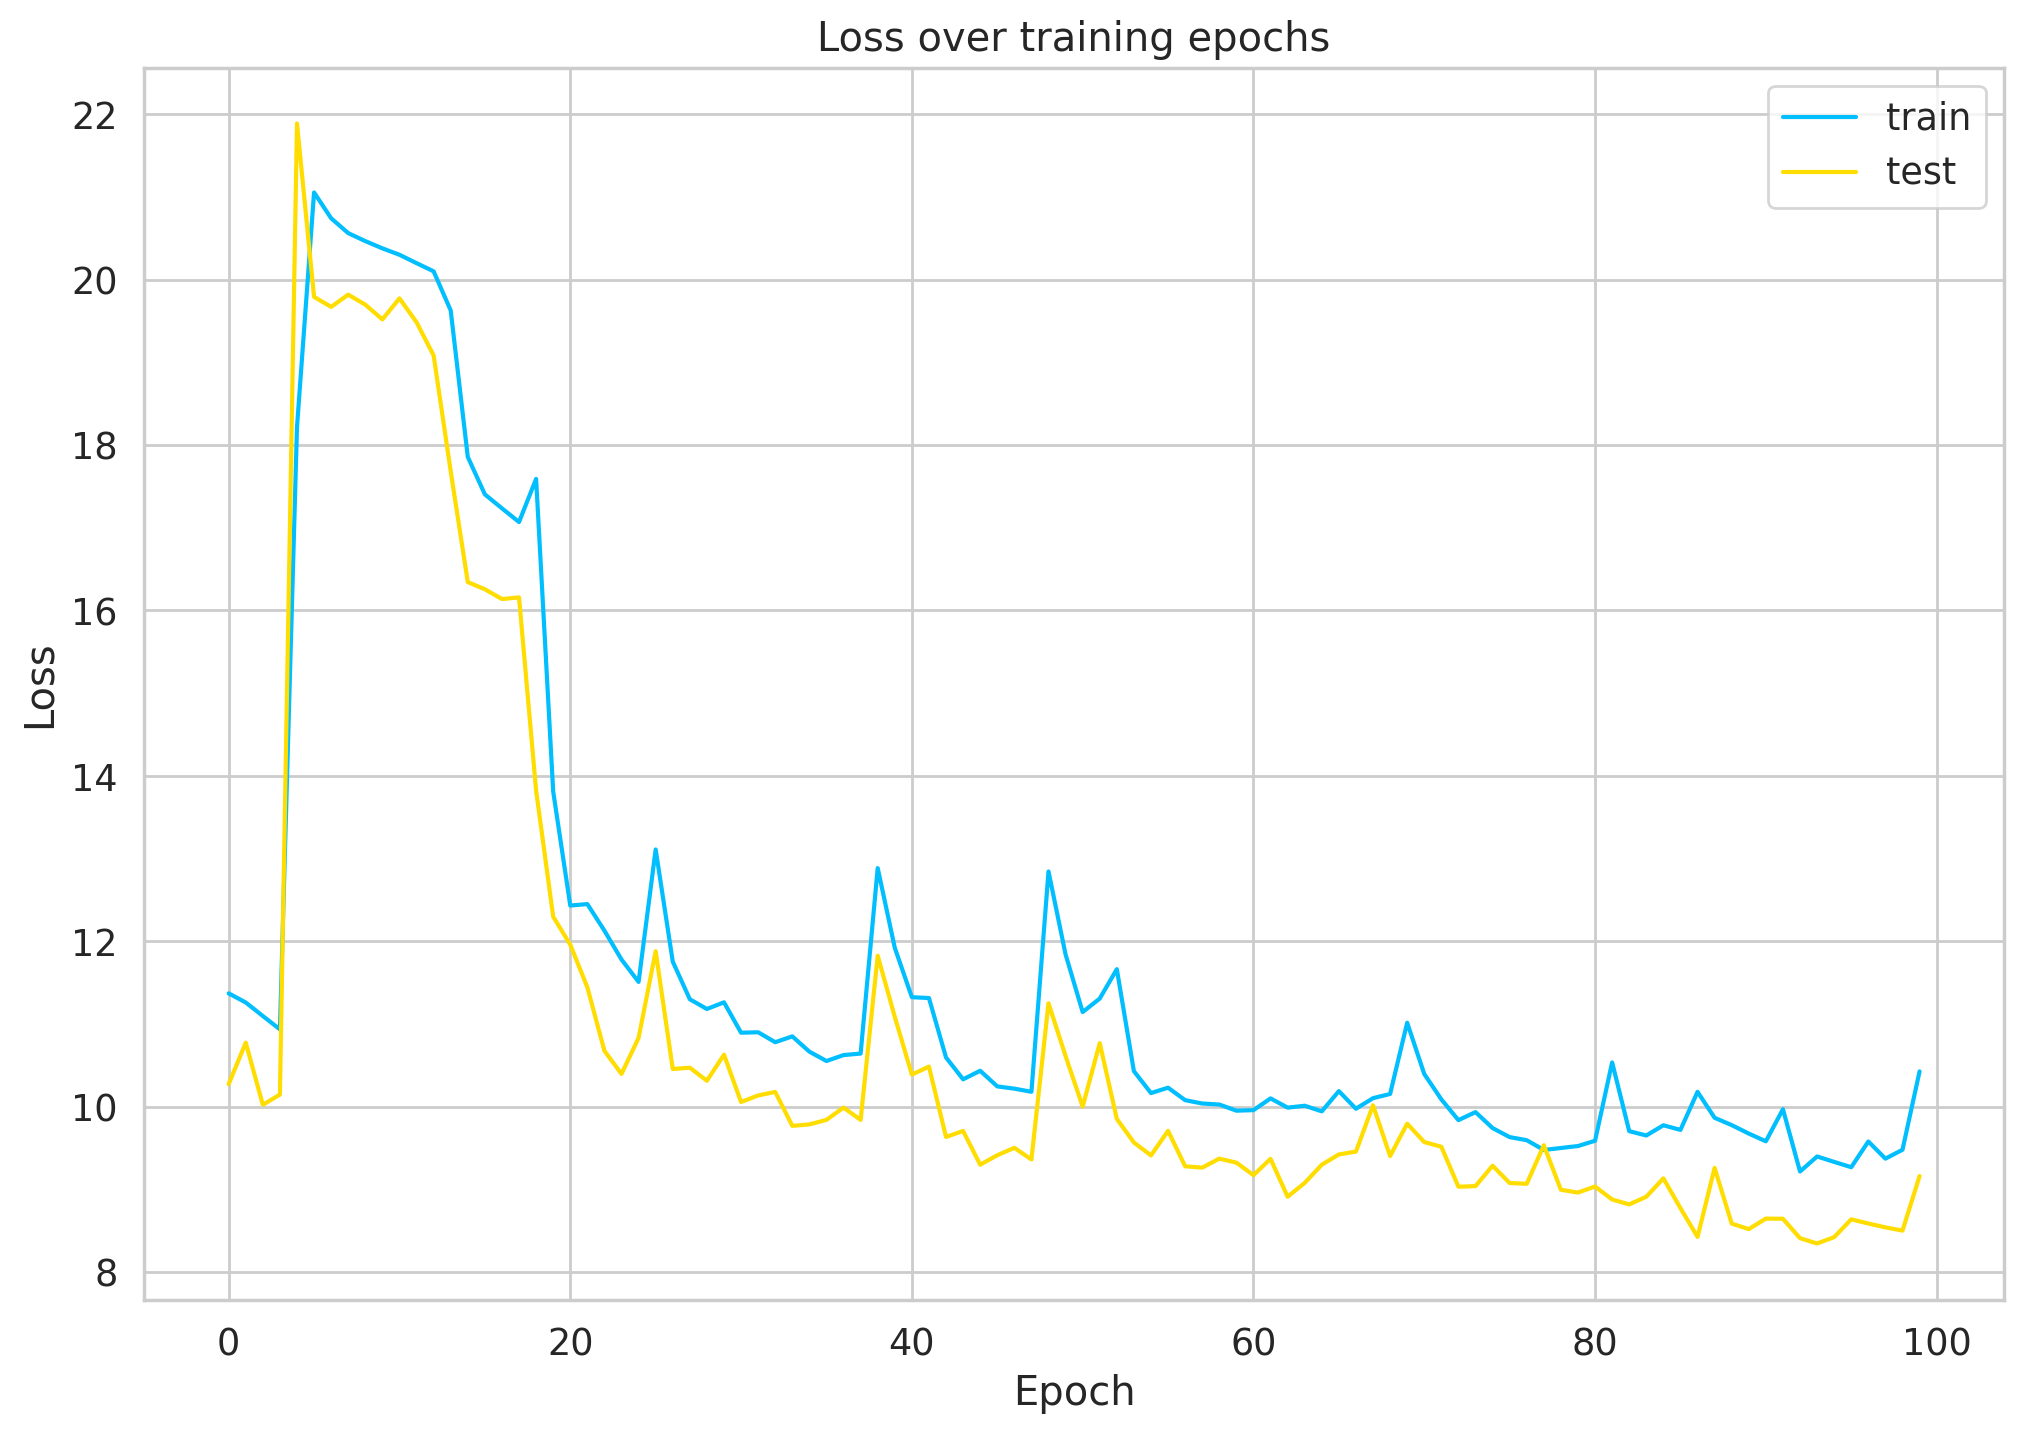

In [ ]:
ax = plt.figure().gca()

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

In [ ]:
MODEL_PATH = '/content/eeg/MyDrive/eeg/modeleeg'

torch.save(model, MODEL_PATH)

In [ ]:

row = selected_columns
plt.figure(figsize=(10, 6))
plt.plot(row)
plt.title('Signal Plot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()
